In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

def normalizar_dados(dados):
    media = sum(x for x in dados) / len(dados)
    print(media)
    desvio_padrao = (sum((x - media) ** 2 for x in dados) / len(dados)) ** 0.5
    return (dados - media) / desvio_padrao

def calcular_polinomio(X, coeficientes):
    termos_polinomio = [coeficientes[i] * tf.pow(X, 20 - i) for i in range(21)]
    return tf.add_n(termos_polinomio)

def calcular_perda(y_real, y_predito, coeficientes):
    erros = y_real - y_predito
    mse = tf.reduce_mean(tf.square(erros))
    return mse

def treinar_regressao_polinomial(X, y, grau, taxa_aprendizado, passos):
    coeficientes = [1e-12] * (grau + 1)
    coeficientes = tf.Variable(coeficientes, dtype=tf.float32)
    otimizador = tf.optimizers.Adam(learning_rate=taxa_aprendizado)

    for passo in range(passos):
        with tf.GradientTape() as tape:
            y_predito = calcular_polinomio(X, coeficientes)
            perda = calcular_perda(y, y_predito, coeficientes)

        gradientes = tape.gradient(perda, [coeficientes])
        otimizador.apply_gradients(zip(gradientes, [coeficientes]))

        if passo % 100 == 0:
            print(f"Passo {passo}: Perda = {perda:.6f}")

    return coeficientes

data = pd.read_csv('datasets/dados_regressao_polinomial_simplificada.csv')
X = tf.cast(data['x'].values, tf.float32)
y = tf.cast(data['y'].values, tf.float32)

X_normalizado = normalizar_dados(X)
y_normalizado = normalizar_dados(y)

grau = 20
taxa_aprendizado = 0.00005
passos = 15000

coeficientes_finais = treinar_regressao_polinomial(X_normalizado, y_normalizado, grau, taxa_aprendizado, passos)

tf.Tensor(9.999999, shape=(), dtype=float32)
tf.Tensor(1058.1769, shape=(), dtype=float32)
Passo 0: Perda = 1.000000
Passo 100: Perda = 0.444784
Passo 200: Perda = 0.383019
Passo 300: Perda = 0.364465
Passo 400: Perda = 0.348046
Passo 500: Perda = 0.331196
Passo 600: Perda = 0.314274
Passo 700: Perda = 0.297598
Passo 800: Perda = 0.281397
Passo 900: Perda = 0.265841
Passo 1000: Perda = 0.251048
Passo 1100: Perda = 0.237097
Passo 1200: Perda = 0.224036
Passo 1300: Perda = 0.211891
Passo 1400: Perda = 0.200698
Passo 1500: Perda = 0.190410
Passo 1600: Perda = 0.182324
Passo 1700: Perda = 0.172435
Passo 1800: Perda = 0.164665
Passo 1900: Perda = 0.159992
Passo 2000: Perda = 0.151304
Passo 2100: Perda = 0.145590
Passo 2200: Perda = 0.140837
Passo 2300: Perda = 0.135781
Passo 2400: Perda = 0.131569
Passo 2500: Perda = 0.133303
Passo 2600: Perda = 0.124232
Passo 2700: Perda = 0.121001
Passo 2800: Perda = 0.118073
Passo 2900: Perda = 0.115143
Passo 3000: Perda = 0.112464
Passo 3100: Perda = 0.

tf.Tensor(0.0020708942, shape=(), dtype=float32)


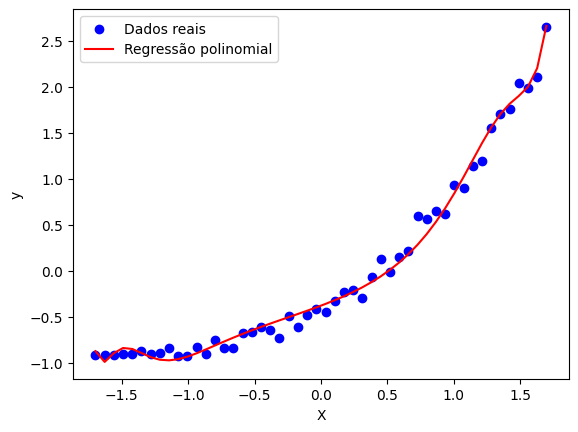

In [25]:
def plotar_resultados(X, y, coeficientes):
    X_plot = tf.linspace(tf.reduce_min(X), tf.reduce_max(X), len(X))
    X_plot = tf.reshape(X_plot, (-1,))
    y_plot = calcular_polinomio(X_plot, coeficientes)
    y_plot = normalizar_dados(y_plot)

    plt.scatter(X, y, color='blue', label='Dados reais')
    plt.plot(X_plot, y_plot, color='red', label='Regressão polinomial')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

plotar_resultados(X_normalizado, y_normalizado, coeficientes_finais)